<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023/blob/main/Python/Python_Machine/Machine_Learning_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 正則化項ー知識編

In [5]:
# 最初にインポートしてください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

最近では、多くのデータを取れるようになり、学習に利用できる特徴量の数も増加する傾向にあるようです。

特徴量が増加することによるデメリットは以下のようなものがあります。  
- 必要なコンピュータリソースが増える
- 追加のデータを取るにコストがかかる
- 解釈がしやすくなる

以上のことから**「不要な特徴量は削除する」**というのが機械学習では一般的なアプローチのようです。

## 正規化項とは

**正則化項(regularization term)**は、アルゴリズムが自動で特徴量選択をしてくれるというやり方です。

機械学習の基本は「損失」を最小にするようにモデルのパラメータを学習することです。

ここでは、損失関数をMSE（参考：[こちら](https://datawokagaku.com/cost_function/#:~:text=%E3%81%A7%E3%81%99%EF%BC%8E%E3%81%93%E3%82%8C%E3%82%92-）として説明します。

- データの数：$m$
- 特徴量の数：$n$

$$
MSE=\frac{1}{m}\sum_{i=1}^{m}{(y_i-\hat{y_i})^2}=\frac{1}{m}\sum_{i=1}^{m}\left(
y_i-\theta_0-\sum_{j=1}^{n}\theta_jx_{ij}\right)^2
$$

これが最小となるように$\theta_0,\theta_1,\cdots, \theta_n$を学習します。

これに正則化項というのを追加します。

＜Lasso＞

$$
L(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(y_i-\theta_0-\sum_{j=1}^{n}\theta_jx_{ij}\right)^2+\lambda\sum_{j=1}^{n}|\theta_j|=MSE+\lambda\sum_{j=1}^{n}|\theta_j|
$$

＜Ridge＞

$$
L(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(y_i-\theta_0-\sum_{j=1}^{n}\theta_jx_{ij}\right)^2+\lambda\sum_{j=1}^{n}{\theta_j}^2=MSE+\lambda\sum_{j=1}^{n}{\theta_j}^2
$$

**Lasso**というアルゴリズムにおける正則化を**L1ノルム**、  
**Ridge**というアルゴリズムにおける正則化を**L2ノルム**といいます。

この正則化項は、損失関数を最小化する際に追加するペナルティのようなものです。

この**正則化項つき損失関数**$L(\theta)$を小さくしていくためには、  
損失関数（MSEなど）だけでなく、$\theta_j$の値を小さくしていく必要があります。

$\lambda$は正則化項におけるパラメータです。  
$\lambda$が大きければ正則化項の影響が大きくなり，モデルはなるべく係数の値を小さくしていきます。

$\lambda$を徐々に大きくしていくと，不要な特徴量の係数$\theta_j$を0に持っていくことができます。  
このようにして、不要な特徴量を落とすことができるようになります。



### Ridge

**L2ノルム**の正則化項を使用するアルゴリズムを**Ridge**といいます。

$$
L(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(y_i-\theta_0-\sum_{j=1}^{n}\theta_jx_{ij}\right)^2+\lambda\sum_{j=1}^{n}{\theta_j}^2=MSE+\lambda\sum_{j=1}^{n}{\theta_j}^2
$$

$\lambda$を大きくするにつれ各特徴量の係数の絶対値は小さくなります。  
一時的に大きくなることもあります。

$\lambda$を大きくしても各特徴量の係数の絶対値が0に近づくだけで、  
 0にはならないため全ての特徴量が必要になります。

また、特徴量同士のスケールが影響するので、  
事前に特徴量スケーリング（標準化や正規化）が必要です。

#### PythonでRidge回帰

では、実際にPythonでRidge回帰を行っていきましょう。

モデルを学習する際は$\lambda$を指定する必要がありますが、  
何も指定していない場合はデフォルト値である1となります。

#### 使用するデータセット

今回は、seabornのサンプル用データセット"tips"を利用します。

データセットは、pandas.DataFrameオブジェクトとして取得することができます。

（参考サイト：[こちら](https://biotech-lab.org/articles/1408#i)）

In [2]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


"tips"のデータの説明は以下の通りです。

- total_bill : 総支払額(食事代、税込み)　(USドル)
- tip : チップ(USドル)
- sex : 性別
- smoker : 喫煙者か否か
- day : 曜日(木・金・土・日のいずれか)
- time : 食事の時間(昼食か夕食か)
- size : 人数

また、今回のデータには欠損値はなさそうです。

#### Pythonによる実行

今回は使用するカラムを増やしたいので、one-hotエンコーディングを行います。

In [3]:
tips = pd.get_dummies(tips, drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


ではRidge回帰を使って学習を行っていきましょう。

本当はk-fold法（参考：[こちら](https://datawokagaku.com/kfoldcv/)）を使って汎化性能を測った方がいいのですが、  
ここでは説明のしやすさのためhold-out法を使います。

In [14]:
# 目的変数に"total_bill"、説明変数にそれ以外のカラムを指定
x = tips.drop('total_bill', axis=1)
y = tips['total_bill']

# データを訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Ridgeモデルの初期化と学習
model = Ridge()
model.fit(x_train_scaled, y_train)

# coefficient  係数
print(pd.Series(model.coef_, index=x.columns))

tip            4.393996
size           3.131295
sex_Female     0.320025
smoker_No     -1.382292
day_Fri       -1.162595
day_Sat       -2.038437
day_Sun       -2.058635
time_Dinner    2.766791
dtype: float64


正則化項なしの線形回帰と比較してみましょう。

In [15]:
# 正則化項なしの線形回帰と比較
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# coefficient  係数
print(pd.Series(model.coef_, index=x.columns))

tip            4.409546
size           3.142303
sex_Female     0.343710
smoker_No     -1.414742
day_Fri       -1.575064
day_Sat       -3.140102
day_Sun       -3.111760
time_Dinner    3.782092
dtype: float64


正則化項なしの線形回帰に比べて、係数の絶対値が少し小さくなったことが確認できました。  
（すべてが小さくなったわけではなく、一部大きくなった特徴量もあるようです）

In [7]:
# 学習データの平均と標準偏差を使って標準化する
x_test_scaled = scaler.transform(x_test)

print('訓練データに対する決定係数：', model.score(x_train_scaled, y_train))
print('テストデータに対する決定係数：', model.score(x_test_scaled, y_test))

訓練データに対する決定係数： 0.5596705312188528
テストデータに対する決定係数： 0.5879459302090297


ただの線形回帰では、決定係数は以下のような結果となりました。

![](https://imgur.com/ncBzlA0.png)

わずかですが、テストデータに対する決定係数が上がったことが確認できます。

#### さまざまなλでのRidge

パラメータ$\lambda$を、デフォルト値の1ではなく変化させたときの、  
MSEの値の変化を見てみましょう。

In [16]:
# np.logspace(-3, 3, 50)と同意
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

Text(0, 0.5, 'test MSE')

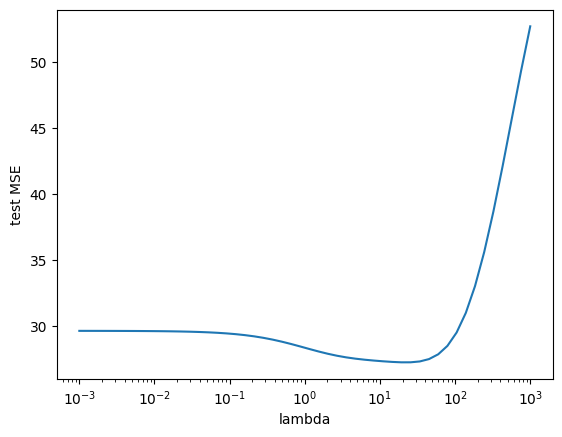

In [17]:
# λ vs MSE

plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

In [19]:
print(f"最適なalpha：{alphas[np.argmin(mse_list)]}")
print(f"最小のMSE：{np.min(mse_list)}")

最適なalpha：19.306977288832496
最小のMSE：27.25112194786355


Text(0, 0.5, 'standardized coefficients')

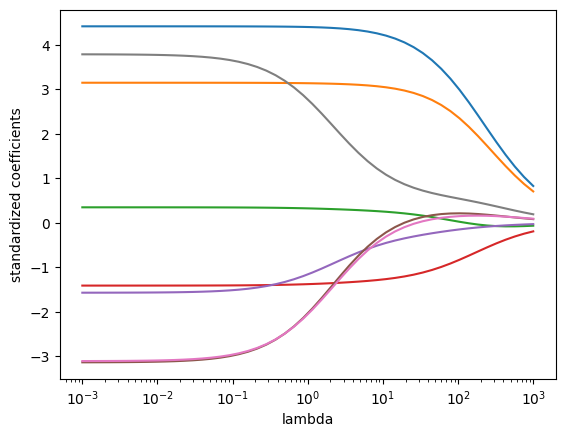

In [22]:
# λ vs 係数
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')

全ての特徴量の係数の値が0に限りなく近づいていますが、  
0にはなっていなさそうです。

#### Pythonによる実行Ver2

$\lambda$の値を最適化できそうなので、改めて学習を行ってみます。

In [23]:
# 目的変数に"total_bill"、説明変数にそれ以外のカラムを指定
x = tips.drop('total_bill', axis=1)
y = tips['total_bill']

# データを訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Ridgeモデルの初期化と学習
model = Ridge(alphas[np.argmin(mse_list)])
model.fit(x_train_scaled, y_train)

# coefficient  係数
print(pd.Series(model.coef_, index=x.columns))

tip            4.048744
size           2.967074
sex_Female     0.207301
smoker_No     -1.209648
day_Fri       -0.353796
day_Sat       -0.002428
day_Sun       -0.102119
time_Dinner    0.862469
dtype: float64


In [24]:
# 学習データの平均と標準偏差を使って標準化する
x_test_scaled = scaler.transform(x_test)

print('訓練データに対する決定係数：', model.score(x_train_scaled, y_train))
print('テストデータに対する決定係数：', model.score(x_test_scaled, y_test))

訓練データに対する決定係数： 0.5526822354688106
テストデータに対する決定係数： 0.6040197730626686


デフォルト値である**`λ=1`**では、決定係数は以下のような結果となりました。

![](https://imgur.com/adORazy.png)

わずかですが、テストデータに対する決定係数が上がったことが確認できます。

### Lasso

**L1ノルム**の正則化項を使用するアルゴリズムを**Lasso**といいます。

$$
L(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(y_i-\theta_0-\sum_{j=1}^{n}\theta_jx_{ij}\right)^2+\lambda\sum_{j=1}^{n}|\theta_j|=MSE+\lambda\sum_{j=1}^{n}|\theta_j|
$$

$\lambda$を大きくするにつれ各特徴量の係数の絶対値は小さくなり、やがて0になります。  
一時的に大きくなることもあります。

$\lambda$を大きくするといづれ各特徴量の係数の絶対値が0になるので、  
学習すると一部の特徴量が不要になります。

また、特徴量同士のスケールが影響するので、  
事前に特徴量スケーリング（標準化や正規化）が必要です。

#### PythonでLasso回帰

では、実際にPythonでLasso回帰を行っていきましょう。

モデルを学習する際は$\lambda$を指定する必要がありますが、  
何も指定していない場合はデフォルト値である1となります。

#### Pythonによる実行

今回は使用するカラムを増やしたいので、one-hotエンコーディングを行います。

In [10]:
tips = pd.get_dummies(tips, drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


ではLasso回帰を使って学習を行っていきましょう。

本当はk-fold法（参考：[こちら](https://datawokagaku.com/kfoldcv/)）を使って汎化性能を測った方がいいのですが、  
ここでは説明のしやすさのためhold-out法を使います。

In [29]:
# 目的変数に"total_bill"、説明変数にそれ以外のカラムを指定
x = tips.drop('total_bill', axis=1)
y = tips['total_bill']

# データを訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# モデルの初期化と学習
model = Lasso()
model.fit(x_train_scaled, y_train)

# coefficient  係数
print(pd.Series(model.coef_, index=x.columns))

tip            3.851536
size           2.394653
sex_Female    -0.000000
smoker_No     -0.374259
day_Fri       -0.000000
day_Sat        0.000000
day_Sun        0.000000
time_Dinner    0.001101
dtype: float64


係数が0となっているものがいくつか見られます。  
この特徴量は最終的に回帰では使っていません。

正則化項なしの線形回帰と比較してみましょう。

In [27]:
# 正則化項なしの線形回帰と比較
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# coefficient  係数
print(pd.Series(model.coef_, index=x.columns))

tip            4.409546
size           3.142303
sex_Female     0.343710
smoker_No     -1.414742
day_Fri       -1.575064
day_Sat       -3.140102
day_Sun       -3.111760
time_Dinner    3.782092
dtype: float64


正則化項なしの線形回帰に比べて、係数の絶対値が小さくなったことが確認できました。  


In [30]:
# 学習データの平均と標準偏差を使って標準化する
x_test_scaled = scaler.transform(x_test)

print('訓練データに対する決定係数：', model.score(x_train_scaled, y_train))
print('テストデータに対する決定係数：', model.score(x_test_scaled, y_test))

訓練データに対する決定係数： 0.5165216248453368
テストデータに対する決定係数： 0.6021489377962732


ただの線形回帰では、決定係数は以下のような結果となりました。

![](https://imgur.com/ncBzlA0.png)

テストデータに対する決定係数が上がったことが確認できます。

#### さまざまなλでのLasso

パラメータ$\lambda$を、デフォルト値の1ではなく変化させたときの、  
MSEの値の変化を見てみましょう。

In [32]:
# np.logspace(-3, 3, 50)と同意
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []
for alpha in alphas:
    model = Lasso(alpha)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

Text(0, 0.5, 'test MSE')

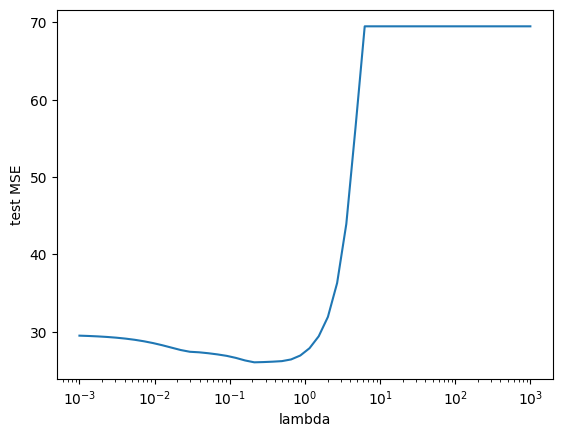

In [33]:
# λ vs MSE

plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

In [34]:
print(f"最適なalpha：{alphas[np.argmin(mse_list)]}")
print(f"最小のMSE：{np.min(mse_list)}")

最適なalpha：0.21209508879201905
最小のMSE：26.06164242117372


Text(0, 0.5, 'standardized coefficients')

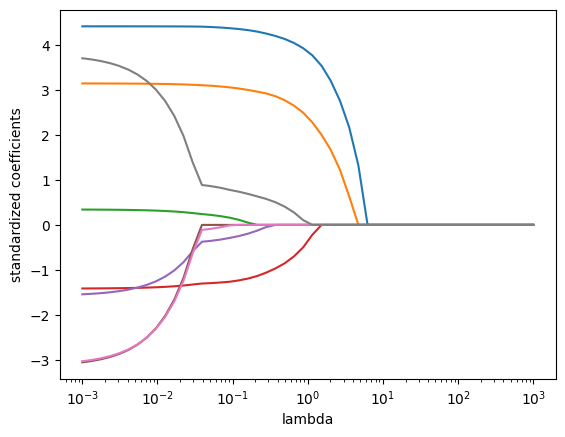

In [35]:
# λ vs 係数
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')

$\lambda$=10のときには、もうすべての係数の値が0になっていることが確認できます。

#### Pythonによる実行Ver2

$\lambda$の値を最適化できそうなので、改めて学習を行ってみます。

In [36]:
# 目的変数に"total_bill"、説明変数にそれ以外のカラムを指定
x = tips.drop('total_bill', axis=1)
y = tips['total_bill']

# データを訓練データとテストデータに分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Ridgeモデルの初期化と学習
model = Lasso(alphas[np.argmin(mse_list)])
model.fit(x_train_scaled, y_train)

# coefficient  係数
print(pd.Series(model.coef_, index=x.columns))

tip            4.292403
size           2.959268
sex_Female     0.000000
smoker_No     -1.135379
day_Fri       -0.127653
day_Sat        0.000000
day_Sun       -0.000000
time_Dinner    0.633133
dtype: float64


In [37]:
# 学習データの平均と標準偏差を使って標準化する
x_test_scaled = scaler.transform(x_test)

print('訓練データに対する決定係数：', model.score(x_train_scaled, y_train))
print('テストデータに対する決定係数：', model.score(x_test_scaled, y_test))

訓練データに対する決定係数： 0.5521734530711395
テストデータに対する決定係数： 0.6213038457631277


デフォルト値である**`λ=1`**では、決定係数は以下のような結果となりました。

![](https://imgur.com/kWaFmiI.png)

テストデータに対する決定係数が上がったことが確認できます。